<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia_eda_analysis/blob/main/EDA_07_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import io

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

plt.rc("font", size = 14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [7]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_10.xlsx')

In [246]:
df.columns

Index(['Order', 'Name', 'Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2',
       'OP', 'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [247]:
df.head()

,Order,Name,Gender,Age,Age_Group,Weight,DM_Type2,OP,Chronic_Diseases,Total_Number_of_Chronic_Diseases,...,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,0,beyzanur 0,M,74.0,AGE 60-80,88.0,1,1,"DM_Type2, KAH,OP",4,...,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.00,27.8,0
1,1,beyzanur 1,M,62.0,AGE 60-80,105.0,0,0,NaN,0,...,not working,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,1
2,2,beyzanur 2,M,65.0,AGE 60-80,89.0,0,0,NaN,0,...,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.96,31.2,0
3,3,beyzanur 3,F,71.0,AGE 60-80,68.0,0,1,"Asthma,OP",5,...,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.03,26.6,0
4,4,beyzanur 4,F,61.0,AGE 60-80,80.0,0,0,Asthma,3,...,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.97,31.3,0


# **Final Arrangements on data frame**

In [248]:
df.drop("Order",axis=1,inplace=True)

In [249]:
df.drop("Name",axis=1,inplace=True)

In [250]:
df.isnull().sum()

,0
Gender,0
Age,0
Age_Group,0
Weight,0
DM_Type2,0
OP,0
Chronic_Diseases,1738
Total_Number_of_Chronic_Diseases,0
Total_Duration_of_Chronic_Diseases,0
Number_of_Drug_Used,0


In [251]:
df["Chronic_Diseases"] = df["Chronic_Diseases"].fillna("No_Disease")

In [252]:
df.Chronic_Diseases.value_counts()

,count
Chronic_Diseases,
No_Disease,1738
OP,672
DM_Type2,380
Hipotiroidi,258
"DM_Type2,OP",177
...,...
"KAH, Hipotiroidi, Asthma",1
"Dyslipidemia, COPD,OP",1
"DM_Type2, Dyslipidemia, KAH, COPD,OP",1


In [253]:
df.Job.value_counts()

,count
Job,
housewife,2256
worker,432
public officer,315
retired or not working,307
retired,163
...,...
babysitter,1
modelist,1
general store,1


In [254]:
df["Job"] = df["Job"].replace("retired or not working", "retired")

In [255]:
df.Job.value_counts().to_string()

'Job\nhousewife                       2256\nretired                          470\nworker                           432\npublic officer                   315\nteacher                          159\nhealth care personel             124\ndriver                            76\nfarmer                            59\nsecretary                         54\ntechnician                        53\nengineer                          53\nbusinessman                       46\ncleaning worker                   42\npoliceman                         38\ntailor                            33\ncook                              31\nmilitary personel                 31\naccountant                        30\nunknown                           26\nconstruction worker               24\nself-employment                   23\nbank clerk                        23\nmanager                           22\ndoctor                            19\nhairdresser                       14\ncaregiver                         14\nwaiter

In [256]:
df["Job"] = df["Job"].replace(["cleaning worker", "unknown", "construction worker","waiter"], "worker")

In [257]:
job_counts = df['Job'].value_counts()

low_count_jobs = job_counts[job_counts < 10].index

df['Job'] = df['Job'].replace(low_count_jobs, 'numbers_below_ten')

print(df['Job'].value_counts())

Job
housewife               2256
worker                   536
retired                  470
public officer           315
numbers_below_ten        271
teacher                  159
health care personel     124
driver                    76
farmer                    59
secretary                 54
engineer                  53
technician                53
businessman               46
policeman                 38
tailor                    33
military personel         31
cook                      31
accountant                30
bank clerk                23
self-employment           23
manager                   22
doctor                    19
caregiver                 14
hairdresser               14
artisan                   11
security guard            10
salesman                  10
pressman                  10
Name: count, dtype: int64


In [258]:
df.Job.value_counts()

,count
Job,
housewife,2256
worker,536
retired,470
public officer,315
numbers_below_ten,271
teacher,159
health care personel,124
driver,76
farmer,59


In [259]:
df["Job"] = df["Job"].replace(["salesman", "artisan", "hairdresser","cook","tailor","accountant","caregiver"], "self-employment")

In [260]:
df["Job"] = df["Job"].replace(["security guard","military personel","policeman"], "security_personel")

In [261]:
df["Job"] = df["Job"].replace("doctor", "health care personel")

In [262]:
job_counts2 = df['Job'].value_counts()

low_count_jobs2 = job_counts2[job_counts2 < 55].index

df['Job'] = df['Job'].replace(low_count_jobs2, 'white_collar_below_55')

print(df['Job'].value_counts())

Job
housewife                2256
worker                    536
retired                   470
public officer            315
numbers_below_ten         271
white_collar_below_55     261
self-employment           166
teacher                   159
health care personel      143
security_personel          79
driver                     76
farmer                     59
Name: count, dtype: int64


In [263]:
df.to_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_11.xlsx', index=False)

In [264]:
df = pd.read_excel('/content/drive/MyDrive/SARCOPENIA_PROJECT/Data_Set_Files/sarcopenia-data-set_columns_corrected_11.xlsx')

# **Logistic Regression Analyses**

#Cleaning columns that will not be used in logistic regression model.

In [265]:
df.columns

Index(['Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Chronic_Diseases', 'Total_Number_of_Chronic_Diseases',
       'Total_Duration_of_Chronic_Diseases', 'Number_of_Drug_Used',
       'Education', 'Job', 'Work_Status', 'Exercise_Status', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia'],
      dtype='object')

In [266]:
df.drop("Age",axis=1,inplace=True)

In [267]:
df.drop("Total_Duration_of_Chronic_Diseases",axis=1,inplace=True)

In [268]:
df.drop("Number_of_Drug_Used",axis=1,inplace=True)

In [269]:
df.head()

,Gender,Age_Group,Weight,DM_Type2,OP,Chronic_Diseases,Total_Number_of_Chronic_Diseases,Education,Job,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,M,AGE 60-80,88.0,1,1,"DM_Type2, KAH,OP",4,University,numbers_below_ten,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.00,27.8,0
1,M,AGE 60-80,105.0,0,0,No_Disease,0,Secondary School,driver,not working,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,1
2,M,AGE 60-80,89.0,0,0,No_Disease,0,University,security_personel,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.96,31.2,0
3,F,AGE 60-80,68.0,0,1,"Asthma,OP",5,University,white_collar_below_55,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.03,26.6,0
4,F,AGE 60-80,80.0,0,0,Asthma,3,University,teacher,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.97,31.3,0


In [414]:
df_logit = df.copy()

In [415]:
df_logit.columns

Index(['Gender', 'Age_Group', 'Weight', 'DM_Type2', 'OP', 'Chronic_Diseases',
       'Total_Number_of_Chronic_Diseases', 'Education', 'Job', 'Work_Status',
       'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR',
       'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

In [416]:
df_logit.drop("Weight",axis=1,inplace=True)

In [417]:
#Encode categorical variables (for logistic regression especially)
df_logit = pd.get_dummies(df_logit, drop_first=True)

In [418]:
df_logit.head()

,DM_Type2,OP,Total_Number_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,1,1,4,50.2,12.5,1.21,32.0,1.81,1.00,27.8,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,37.3,8.7,1.18,33.0,1.20,0.96,31.2,...,False,True,False,False,False,False,False,False,False,True
3,0,1,5,29.5,8.3,1.23,25.0,1.11,1.03,26.6,...,False,False,False,False,True,False,False,False,True,False
4,0,0,3,39.5,11.0,1.31,31.0,1.26,0.97,31.3,...,False,False,False,True,False,False,False,False,True,False


In [419]:
df_logit.columns.to_list()

['DM_Type2',
 'OP',
 'Total_Number_of_Chronic_Diseases',
 'AT',
 'CST',
 'Gait_Speed',
 'Grip_Str',
 'STAR',
 'Waist_Hip_Ratio',
 'BMI',
 'Sarcopenia',
 'Gender_M',
 'Age_Group_AGE 60-80',
 'Age_Group_AGE 80-100',
 'Chronic_Diseases_Asthma,OP',
 'Chronic_Diseases_COPD',
 'Chronic_Diseases_COPD,OP',
 'Chronic_Diseases_DM_Type2',
 'Chronic_Diseases_DM_Type2, Asthma',
 'Chronic_Diseases_DM_Type2, Asthma, COPD,OP',
 'Chronic_Diseases_DM_Type2, Asthma,OP',
 'Chronic_Diseases_DM_Type2, COPD',
 'Chronic_Diseases_DM_Type2, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Typ

In [420]:
df_logit.drop(['Chronic_Diseases_Asthma,OP',
 'Chronic_Diseases_COPD,OP',
 'Chronic_Diseases_DM_Type2',
 'Chronic_Diseases_DM_Type2, Asthma',
 'Chronic_Diseases_DM_Type2, Asthma, COPD,OP',
 'Chronic_Diseases_DM_Type2, Asthma,OP',
 'Chronic_Diseases_DM_Type2, COPD',
 'Chronic_Diseases_DM_Type2, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia,OP',
 'Chronic_Diseases_DM_Type2, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, COPD',
 'Chronic_Diseases_DM_Type2, Hipotiroidi,OP',
  'Chronic_Diseases_DM_Type2, Insulin',
 'Chronic_Diseases_DM_Type2, Insulin, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, COPD',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, COPD,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH,OP',
 'Chronic_Diseases_DM_Type2, Insulin,OP',
 'Chronic_Diseases_DM_Type2, KAH',
 'Chronic_Diseases_DM_Type2, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, KAH, COPD',
 'Chronic_Diseases_DM_Type2, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, KAH,OP',
 'Chronic_Diseases_DM_Type2,OP',
 'Chronic_Diseases_Dyslipidemia, Asthma',
 'Chronic_Diseases_Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, COPD',
 'Chronic_Diseases_Dyslipidemia, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, Asthma, COPD',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_Dyslipidemia, KAH',
 'Chronic_Diseases_Dyslipidemia, KAH, Asthma',
 'Chronic_Diseases_Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, COPD',
 'Chronic_Diseases_Dyslipidemia, KAH, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_Dyslipidemia, KAH,OP',
 'Chronic_Diseases_Dyslipidemia,OP',
 'Chronic_Diseases_Hipotiroidi, Asthma',
 'Chronic_Diseases_Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Hipotiroidi, COPD',
 'Chronic_Diseases_Hipotiroidi, COPD,OP',
 'Chronic_Diseases_Hipotiroidi,OP',
 'Chronic_Diseases_KAH, Asthma',
 'Chronic_Diseases_KAH, Asthma, COPD,OP',
 'Chronic_Diseases_KAH, Asthma,OP',
 'Chronic_Diseases_KAH, COPD',
 'Chronic_Diseases_KAH, COPD,OP',
 'Chronic_Diseases_KAH, Hipotiroidi',
 'Chronic_Diseases_KAH, Hipotiroidi, Asthma',
 'Chronic_Diseases_KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_KAH, Hipotiroidi,OP',
 'Chronic_Diseases_KAH,OP',
 'Chronic_Diseases_OP','Chronic_Diseases_No_Disease'],axis=1,inplace=True)

In [421]:
df_logit.columns

Index(['DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia', 'Gender_M', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100',
       'Chronic_Diseases_COPD', 'Chronic_Diseases_Dyslipidemia',
       'Chronic_Diseases_Hipotiroidi', 'Chronic_Diseases_KAH',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Job_farmer',
       'Job_health care personel', 'Job_housewife', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [422]:
#Split into features and target
X = df_logit.drop('Sarcopenia', axis=1)
y = df_logit['Sarcopenia']

In [423]:
# 1. Calculate the correlation matrix
correlation_matrix = X.corr()

# 2. Look for highly correlated variables
# Define your correlation threshold
threshold = 0.60 # Adjust this value as needed

high_correlation_pairs = []

# Iterate through the correlation matrix
# We iterate only the upper triangle to avoid duplicates and self-correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.loc[col1, col2]

        if abs(correlation_value) >= threshold:
            high_correlation_pairs.append((col1, col2, correlation_value))

print("\nVariables with very high correlation (absolute value >= {}):".format(threshold))
if high_correlation_pairs:
    for col1, col2, corr_value in high_correlation_pairs:
        print(f"  - {col1} and {col2}: {corr_value:.4f}")
else:
    print("  No highly correlated variable pairs found at this threshold.")


Variables with very high correlation (absolute value >= 0.6):
  - AT and STAR: 0.7491
  - Grip_Str and Gender_M: 0.6787


In [424]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df['Sarcopenia'])

In [425]:
# Fit model
log_model = LogisticRegression(max_iter=100000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [426]:
#Evaluate
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[956  43]
 [ 75 180]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       999
           1       0.81      0.71      0.75       255

    accuracy                           0.91      1254
   macro avg       0.87      0.83      0.85      1254
weighted avg       0.90      0.91      0.90      1254



In [427]:
#Analyze coefficients
log_coef_df_logit = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_model.coef_[0]})
print(log_coef_df_logit.sort_values(by='Coefficient', key=abs, ascending=False))

                             Feature  Coefficient
10                          Gender_M     5.522901
7                               STAR    -2.661640
8                    Waist_Hip_Ratio     1.045111
32               Work_Status_unknown    -0.698609
22          Job_health care personel    -0.675360
23                     Job_housewife    -0.559861
24             Job_numbers_below_ten    -0.530566
34          Exercise_Status_1-2/week     0.490562
13             Chronic_Diseases_COPD     0.442623
18        Education_Secondary School     0.379258
26                       Job_retired    -0.360583
30         Job_white_collar_below_55    -0.352719
4                                CST     0.318440
31                        Job_worker    -0.312910
17          Education_Primary School     0.293256
29                       Job_teacher     0.266220
9                                BMI     0.265986
28               Job_self-employment    -0.236490
3                                 AT    -0.235483


In [428]:
print(X_train.dtypes)

DM_Type2                              int64
OP                                    int64
Total_Number_of_Chronic_Diseases      int64
AT                                  float64
CST                                 float64
Gait_Speed                          float64
Grip_Str                            float64
STAR                                float64
Waist_Hip_Ratio                     float64
BMI                                 float64
Gender_M                               bool
Age_Group_AGE 60-80                    bool
Age_Group_AGE 80-100                   bool
Chronic_Diseases_COPD                  bool
Chronic_Diseases_Dyslipidemia          bool
Chronic_Diseases_Hipotiroidi           bool
Chronic_Diseases_KAH                   bool
Education_Primary School               bool
Education_Secondary School             bool
Education_University                   bool
Education_illiterate                   bool
Job_farmer                             bool
Job_health care personel        

In [429]:
for col in X_train.columns:
    try:
        X_train[col] = X_train[col].astype("int64") if X_train[col].dtype == "bool" else X_train[col]
    except ValueError:
        print(f"Column '{col}' still contains non-numeric values after select_dtypes.")

In [430]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [431]:
# Statistical Significance (using statsmodels)
# Add constant BEFORE calculating VIF
X_train_sm = sm.add_constant(X_train)

# Calculate VIF for each feature
# We need to handle potential infinite VIFs (perfect multicollinearity)
# Let's define a function to calculate VIF safely
def calculate_vif(df_logit):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_logit.columns
    vif_data["VIF"] = [variance_inflation_factor(df_logit.values, i)
                       for i in range(df_logit.shape[1])]
    # Replace inf with a large number or NaN if needed, but for removal, inf is fine
    return vif_data

# Let's set a threshold for VIF
vif_threshold = 10

# Iteratively remove features with high VIF
while True:
    vif_df_logit = calculate_vif(X_train_sm)
    # Exclude the constant column from VIF checks for removal
    vif_df_logit_no_const = vif_df_logit[vif_df_logit['feature'] != 'const']

    if vif_df_logit_no_const['VIF'].max() > vif_threshold:
        # Get the feature with the highest VIF (excluding constant)
        feature_to_remove = vif_df_logit_no_const.sort_values(by="VIF", ascending=False).iloc[0]['feature']
        print(f"Removing feature '{feature_to_remove}' with VIF = {vif_df_logit[vif_df_logit['feature'] == feature_to_remove]['VIF'].iloc[0]}")
        # Remove the feature from the training data
        X_train_sm = X_train_sm.drop(columns=[feature_to_remove])
    else:
        print("All VIFs are below the threshold.")
        break

Removing feature 'STAR' with VIF = 24.48474140549232
All VIFs are below the threshold.


In [432]:
#Statistical Significance (using statsmodels)
X_train_sm = sm.add_constant(X_train)

log_model_sm = sm.Logit(y_train, X_train_sm).fit()
print(log_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.200989
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Sarcopenia   No. Observations:                 3762
Model:                          Logit   Df Residuals:                     3725
Method:                           MLE   Df Model:                           36
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                  0.6017
Time:                        12:48:33   Log-Likelihood:                -756.12
converged:                       True   LL-Null:                       -1898.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.3355      1.528      2.83

**Looking at P-values and Coefficients, these are the outcomes of this analysis:
Variables of AT,CST,Grip_Str,STAR, BMI, Gender, Job_Housewife, Job_worker and Exercise_Status_1-2/week have statistically significant impacts on the dependent variable "Sarcopenia". Looking at the coefficients, especially STAR variable has negative but very strong influence on Sarcopenia. Job_type and Work_status also have negative strong effects on the outcome. In addition,Gender and Exercise related variables have also strong positive influence on Sarcopenia.**

Confusion Matrix


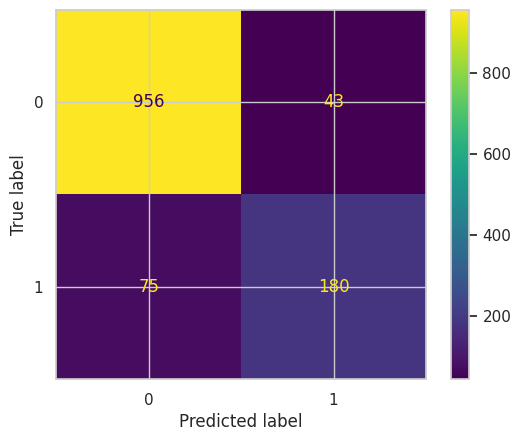

In [434]:
print('Confusion Matrix')
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show() # Add this line to display the plot

In [ ]:
sns.boxplot(data=df, x='significant_feature', y='target_column')
sns.scatterplot(data=df, x='strong_predictor', y='target_column')